In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
car = pd.read_csv(r"C:\Users\91630\Downloads\car dataset.csv")
car.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [33]:
car.shape

(426, 15)

( For Data Cleaning ) Find all Null Values in the dataset. If there is any null value in any column, then fill it with the mean of that column.

In [31]:
car.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [3]:
#Dropping All the null values
car = car.dropna(subset=['EngineSize' ,'Cylinders','Horsepower','MPG_City',
                         'MPG_Highway','Weight','Wheelbase','Length'])
car = car.dropna(subset=['Make', 'Model', 'Type', 'DriveTrain', 'MSRP', 'Invoice'])

Check what are the different types of Make are there in our dataset. And, what is the count (occurrence) of each Make in the data

In [4]:
# Count occurrences of each Make
make_counts = car['Make'].value_counts()

Show all the records where Origin is Asia or Europe ( Filtering )

In [5]:
# Filter data for cars from Asia or Europe
asia_europe_cars = car[car['Origin'].isin(['Asia', 'Europe'])]
asia_europe_cars.shape

(279, 15)

CALCULATE THE AVERAGE MSRP OF EACH MAKER

In [6]:
# Calculate average MSRP of each Make
# Remove , and $ symbols from MSRP column
car['MSRP'] = car['MSRP'].str.replace(',', '').str.replace('$', '').astype(float)
make_avg_msrp = car.groupby('Make')['MSRP'].mean().sort_values(ascending=False)

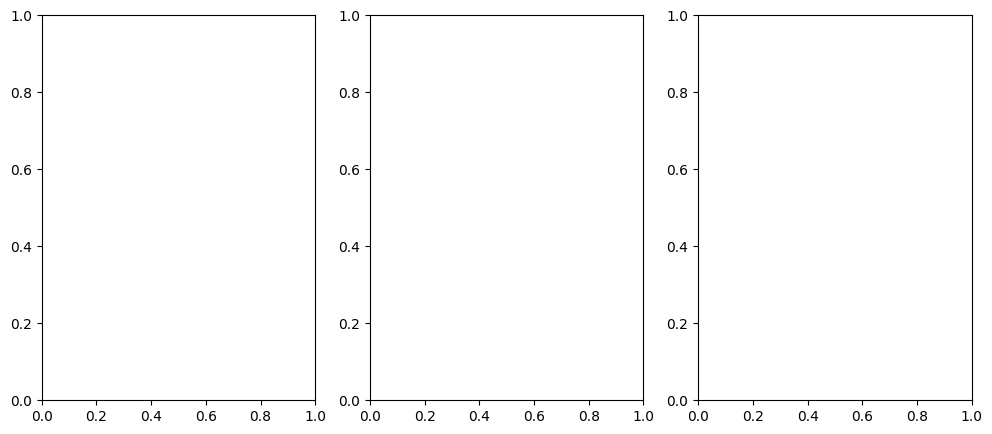

In [7]:
# Display results using charts
fig, axs = plt.subplots(1, 3, figsize=(12, 5))


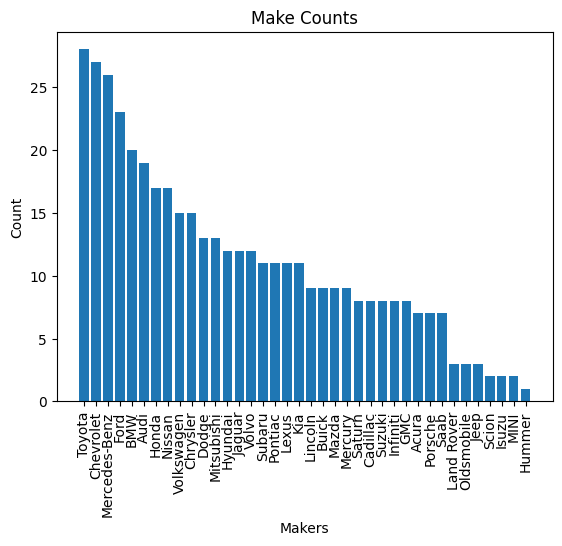

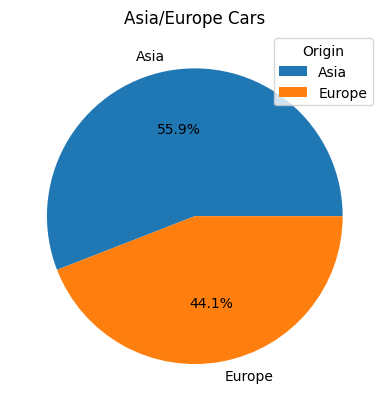

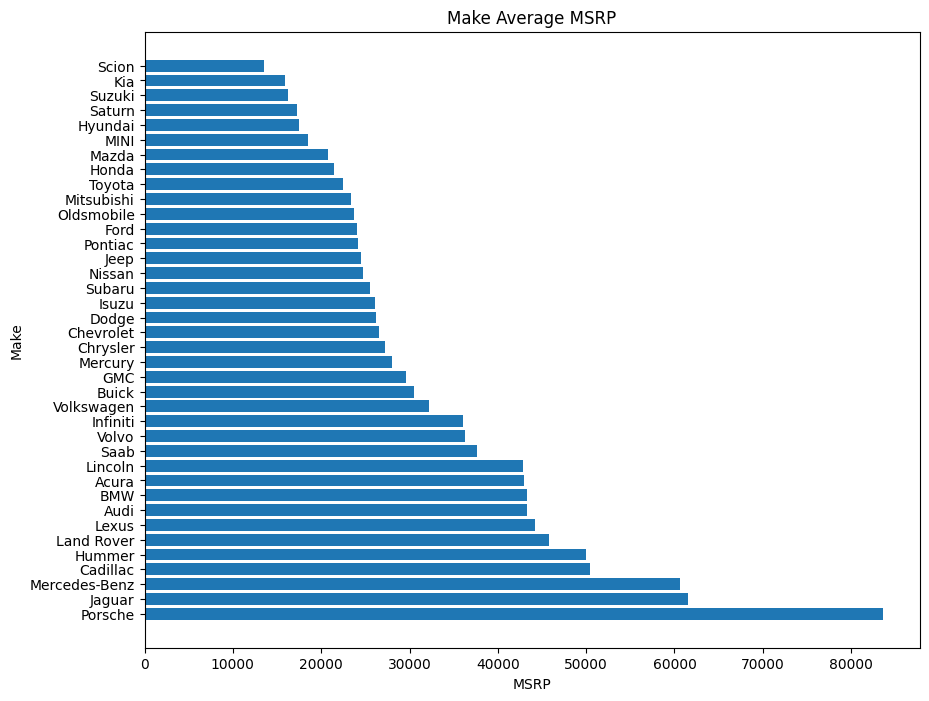

In [8]:
# Bar chart for Make counts
plt.bar(make_counts.index, make_counts.values)
plt.xticks(rotation=90)
plt.title('Make Counts')
plt.xlabel('Makers')
plt.ylabel('Count')
plt.show()

# Pie chart for Asia/Europe cars
asia_europe_counts = asia_europe_cars['Origin'].value_counts()
plt.pie(asia_europe_counts.values, labels=asia_europe_counts.index, autopct='%1.1f%%')
plt.title('Asia/Europe Cars')
plt.legend(title='Origin', loc='upper right')
plt.show()

# Horizontal bar chart for Make average MSRP
fig = plt.figure(figsize=(10,8))
plt.barh(make_avg_msrp.index, make_avg_msrp.values)
plt.title('Make Average MSRP')
plt.xlabel('MSRP')
plt.ylabel('Make')
plt.show()